In [1]:
import os
import json, statistics 
import math

def round_to_n_significant_figures(num, n=3):
    if num != 0:
        return round(num, -int(math.floor(math.log10(abs(num)))) + (n - 1))
    else:
        return 0 


name_mapper = {
    "gcn": "GCN",
    "bayesian_gcn": "Bayesian GCN",
    "ensemble_gcn": "Ensemble GCN",
    "graph_neural_ode": "GNODE",
    "graph_neural_sde": "\\textbf{GNSDE} (ours)",
    "GNSDE-GRAND": "GNSDE-GRAND (ours)",
    "GNSDE-GRAND_(1)": "GNSDE-GRAND 2 (ours)",
    "GNSDE": "GNSDE (ours)",
    "GNSDE_(1)": "GNSDE 2 (ours)",
    "GRAND": "GRAND-l",
    "GRAND_(1)": "GRAND 2",

   
}

def read_json_files(directory):
    results_dict = {}
    # Get the current working directory
    cwd = os.getcwd()
    directory = cwd + directory
    # Walk through the directory
    for root, dirs, files in os.walk(directory):
        print("1", root, dirs, files)
        # Skip the 'political_compass' folder
        if 'political_compass' in dirs:
            dirs.remove('political_compass')
        
        # Process each JSON file
        for file in files:
            if file.endswith('.json'):
                dataset = os.path.basename(root)  # The folder name is the dataset name
                model = name_mapper[file.replace('accuracies_', '').replace('.json', '')]  # Extract the model name from the file name
                
                # Read the JSON file
                with open(os.path.join(root, file), 'r') as f:
                    data = json.load(f)
                    for entropy_thresholds in data.keys():
                        acc = data[entropy_thresholds]
                        filtered_acc = [x for x in acc if x is not None]
                        acc_mean = statistics.mean(filtered_acc)
                        acc_std = statistics.stdev(filtered_acc)
                        data[entropy_thresholds] = {}
                        data[entropy_thresholds]['mean'] = round_to_n_significant_figures(acc_mean * 100, n=3)
                        data[entropy_thresholds]['std'] = round(acc_std * 100, 1)
                        
                
                # Extract mean and std accuracies and add to the results dictionary
                if dataset not in results_dict:
                    results_dict[dataset] = {}
                results_dict[dataset][model] = data  # Assuming the JSON structure matches your requirements

    sorted_results = {}
    for dataset, models in results_dict.items():
        sorted_models = {model_name: models[model_name] for model_name in name_mapper.values() if model_name in models}
        sorted_results[dataset] = sorted_models

    return sorted_results

# Use the function to read JSON files from a directory
results = read_json_files('/results')  # Replace with the actual path to the 'results' directory


1 /scratch/rsb63/gn-sde/benchmarks/GRAND/src/results ['citeseer', 'cora', 'pubmed', 'photo', 'computers', 'ogbn-arxiv', 'coauthorcs'] []
1 /scratch/rsb63/gn-sde/benchmarks/GRAND/src/results/citeseer [] ['accuracies_GRAND_planetoid_split.json', 'accuracies_GNSDE-GRAND.json', 'accuracies_GNSDE-GRAND_planetoid_split.json', 'accuracies_GRAND.json', 'accuracies_GNSDE.json']


KeyError: 'GRAND_planetoid_split'

In [11]:
results['cora']['GRAND-l']['inf']

{'mean': 84.0, 'std': 1.3}

In [12]:
results['cora']['GNSDE-GRAND (ours)']['inf'], results['cora']['GNSDE (ours)']['inf']

({'mean': 83.5, 'std': 1.3}, {'mean': 80.6, 'std': 1.4})

In [13]:
results['citeseer']['GNSDE-GRAND (ours)']['inf'], results['citeseer']['GNSDE (ours)']['inf']

({'mean': 74.5, 'std': 1.7}, {'mean': 69.7, 'std': 2.5})

In [14]:
results['pubmed']['GNSDE-GRAND (ours)']['inf'], results['pubmed']['GNSDE (ours)']['inf']

({'mean': 80.0, 'std': 1.8}, {'mean': 76.7, 'std': 2.3})

In [15]:
results['coauthorcs']['GNSDE-GRAND (ours)']['inf'], results['coauthorcs']['GNSDE (ours)']['inf']

({'mean': 89.2, 'std': 0.8}, {'mean': 90.0, 'std': 0.3})

In [16]:
results['computers']['GNSDE-GRAND (ours)']['inf'], results['computers']['GNSDE (ours)']['inf']

({'mean': 85.8, 'std': 0.8}, {'mean': 83.9, 'std': 0.5})

In [17]:
results['photo']['GNSDE-GRAND (ours)']['inf'], results['photo']['GNSDE (ours)']['inf']

({'mean': 91.5, 'std': 0.5}, {'mean': 92.1, 'std': 0.2})

In [18]:
results['ogbn-arxiv']['GNSDE-GRAND (ours)']['inf'],

({'mean': 63.9, 'std': 1.0},)

1 /scratch/rsb63/gn-sde/benchmarks/GRAND/src/results ['citeseer', 'cora', 'pubmed', 'photo', 'computers', 'ogbn-arxiv', 'coauthorcs'] []
1 /scratch/rsb63/gn-sde/benchmarks/GRAND/src/results/citeseer [] ['accuracies_GNSDE-GRAND.json', 'accuracies_GRAND.json', 'accuracies_GNSDE.json']
1 /scratch/rsb63/gn-sde/benchmarks/GRAND/src/results/cora [] ['accuracies_GNSDE-GRAND.json', 'accuracies_GRAND.json', 'accuracies_GNSDE.json']
1 /scratch/rsb63/gn-sde/benchmarks/GRAND/src/results/pubmed [] ['accuracies_GNSDE-GRAND.json', 'accuracies_GRAND.json', 'accuracies_GNSDE.json']
1 /scratch/rsb63/gn-sde/benchmarks/GRAND/src/results/photo [] ['accuracies_GNSDE-GRAND.json', 'accuracies_GRAND.json', 'accuracies_GNSDE.json']
1 /scratch/rsb63/gn-sde/benchmarks/GRAND/src/results/computers [] ['accuracies_GNSDE-GRAND.json', 'accuracies_GRAND.json', 'accuracies_GNSDE.json']
1 /scratch/rsb63/gn-sde/benchmarks/GRAND/src/results/ogbn-arxiv [] ['accuracies_GNSDE-GRAND.json']
1 /scratch/rsb63/gn-sde/benchmarks/GR

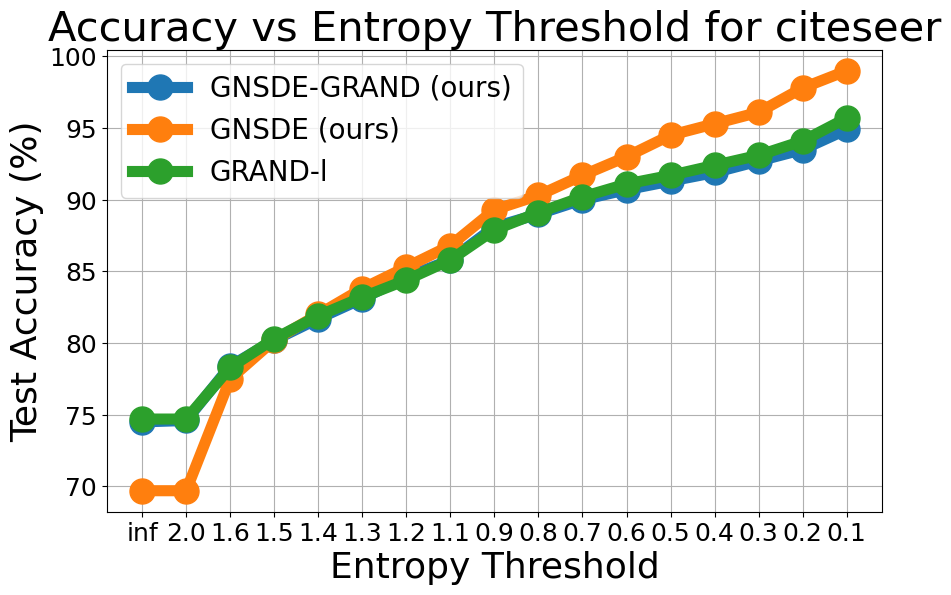

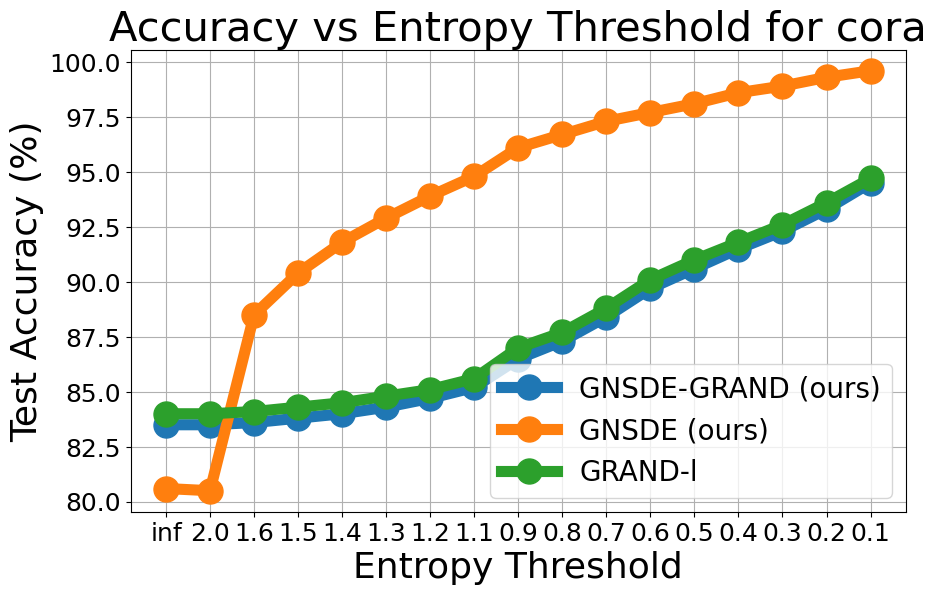

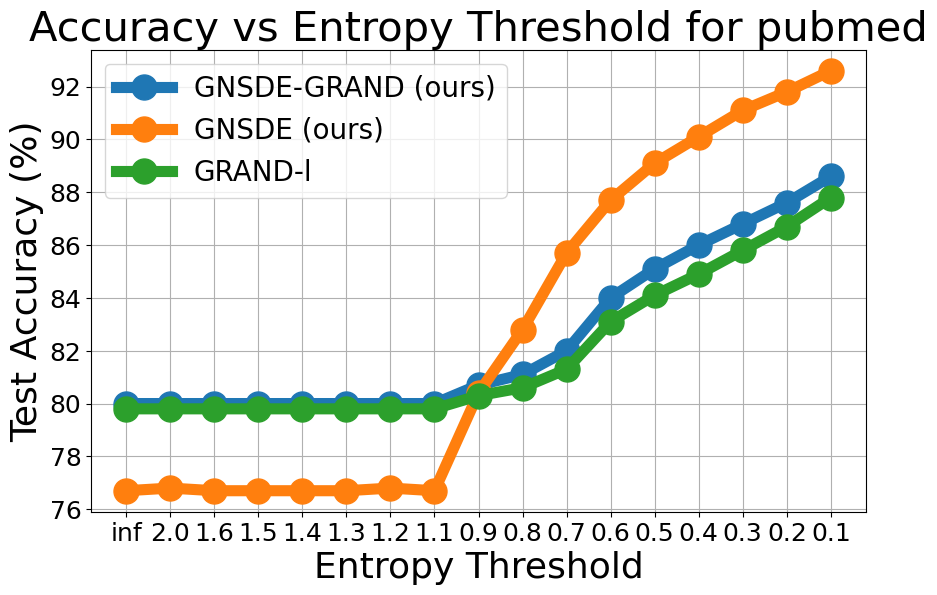

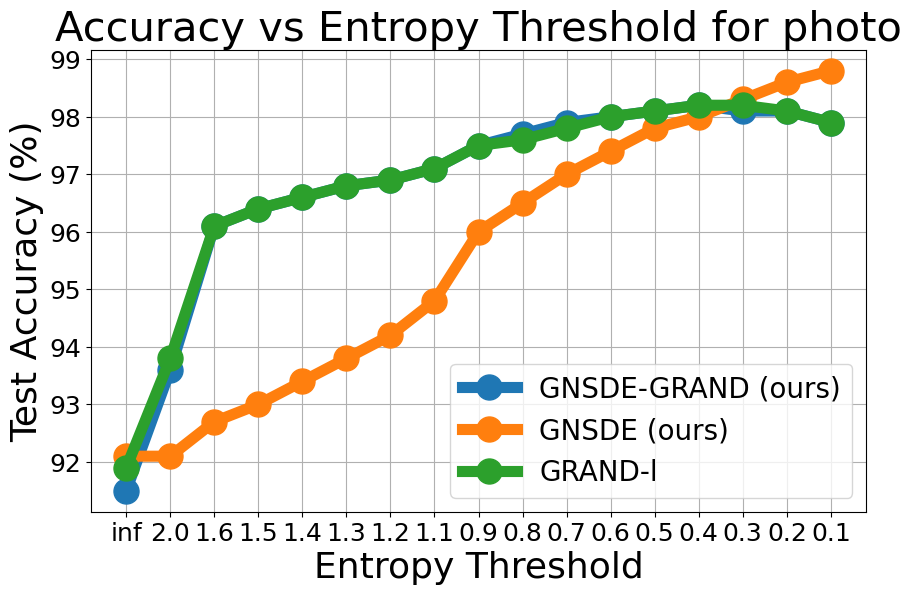

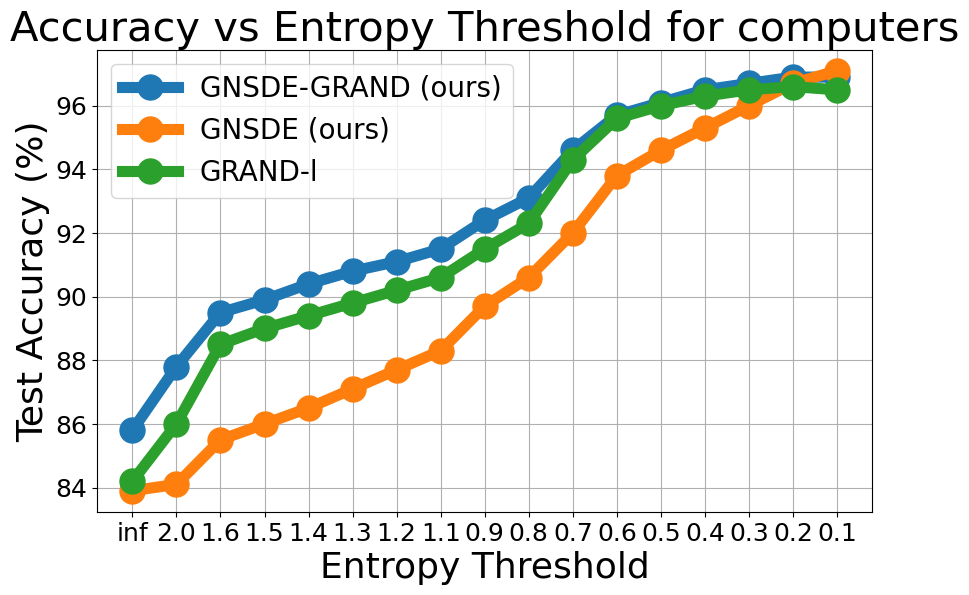

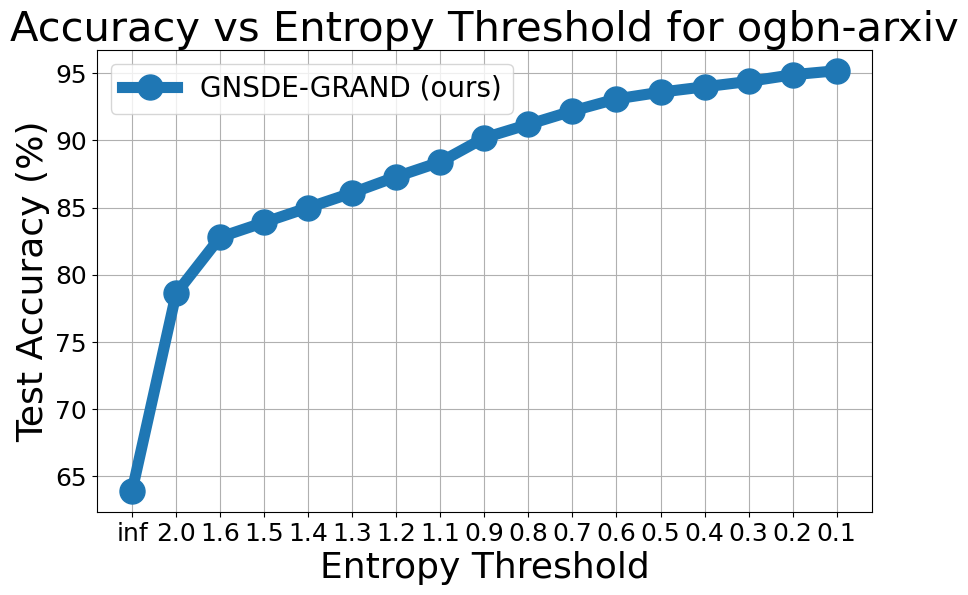

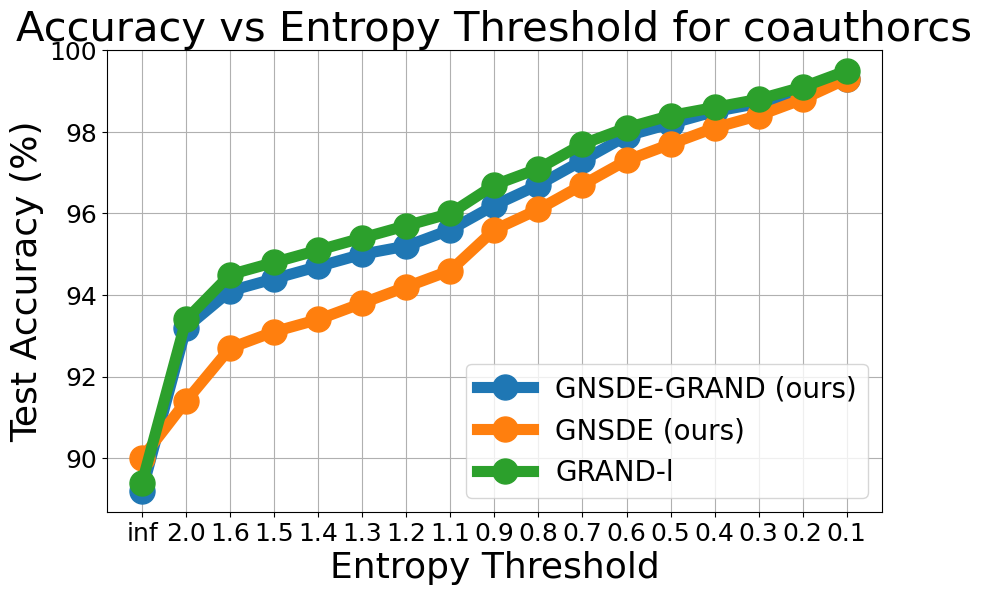

In [19]:
import matplotlib.pyplot as plt


def plot_accuracy_vs_entropy(dataset_results, dataset_name):
    plt.figure(figsize=(10, 6))

    for model, entropy_data in dataset_results.items():
        # Handle 'inf' threshold and convert other thresholds to float
        entropy_thresholds = []
        accuracies_mean = []
        for et in entropy_data.keys():
            if et == 'inf':
                entropy_thresholds.append(3)  # Assign a value greater than the largest threshold
                accuracies_mean.append(entropy_data[et]['mean'])
            else:
                entropy_thresholds.append(float(et))
                accuracies_mean.append(entropy_data[et]['mean'])

        # Sort by descending entropy threshold
        sorted_data = sorted(zip(entropy_thresholds, accuracies_mean), reverse=True)
        sorted_entropy_thresholds, sorted_accuracies_mean = zip(*sorted_data)

        # Replace the numeric value for 'inf' with the string 'inf' for plotting
        sorted_entropy_thresholds = ['inf' if et == 3 else et for et in sorted_entropy_thresholds]

        # Plot the data
        plt.plot(sorted_entropy_thresholds, sorted_accuracies_mean, marker='o', label=model, linewidth=8, markersize=18)
    
    plt.title(f'Accuracy vs Entropy Threshold for {dataset_name}', fontsize=30)
    plt.xlabel('Entropy Threshold', fontsize=26)
    plt.ylabel('Test Accuracy (%)', fontsize=26)
    # plt.tick_params(axis='both', which='major', labelsize=24)
    plt.legend(fontsize=20, ncol=1)
    plt.grid(True)
    plt.savefig(f'{dataset_name}_accuracy_vs_entropy.png')  # Save the figure
    plt.tick_params(axis='both', which='major', labelsize=18)

    plt.show()

# Usage of the plotting function
results = read_json_files('/results')  # Replace with your actual directory
for dataset in results:
    plot_accuracy_vs_entropy(results[dataset], dataset)


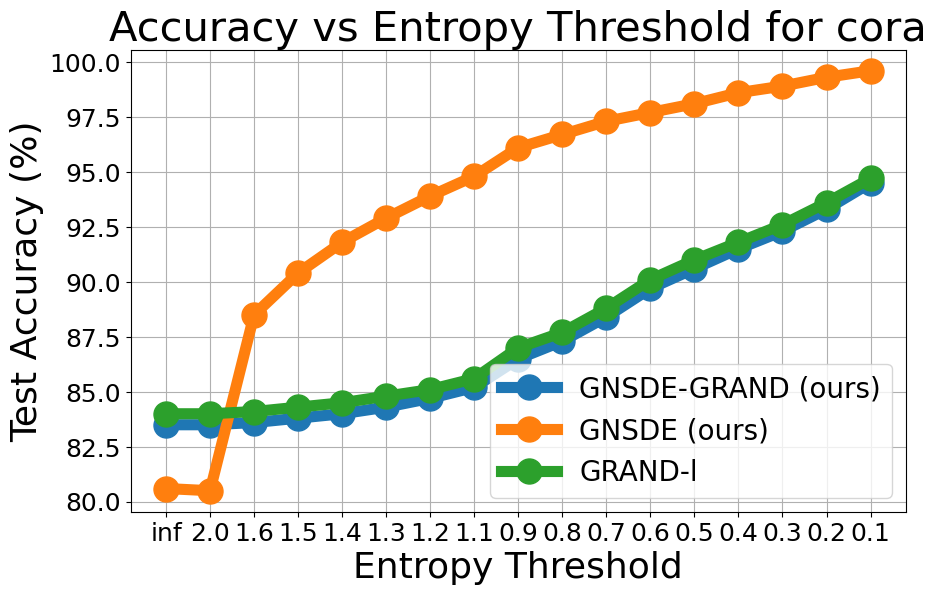

In [20]:
dataset = 'cora'
plot_accuracy_vs_entropy(results[dataset], dataset)

In [3]:
results.keys()

NameError: name 'results' is not defined

In [7]:
dataset = 'pubmed'
plot_accuracy_vs_entropy(results[dataset], dataset)

NameError: name 'plot_accuracy_vs_entropy' is not defined

In [5]:
dataset = 'citeseer'
plot_accuracy_vs_entropy(results[dataset], dataset)

NameError: name 'plot_accuracy_vs_entropy' is not defined

In [6]:
dataset = 'computers'
plot_accuracy_vs_entropy(results[dataset], dataset)

NameError: name 'plot_accuracy_vs_entropy' is not defined

In [9]:
# Results for each dataset and each model
model_results = {
    'CORA': {
        'GCN': (81.5, 1.3),
        'GAT': (81.8, 1.3),
        'MoNet': (81.3, 0.3),
        'GAT-vpr': (81.6, 1.3),
        'GS-mean': (79.2, 1.7),
        'GS-maxpool': (76.6, 1.9),
        'CGNN': (81.4, 1.6),
        'GDE': (78.7, 2.2),
        'GRAND-l': (83.6, 1.0),
        'GRAND-nl': (82.3, 1.6),
        'GRAND-nl-rw': (83.3, 1.3),
        'GNSDE': (81.6, 1.4),
        'GNSDE-GRAND': (83.5, 1.3),
    },
    'CiteSeer': {
        'GCN': (71.9, 1.9),
        'GAT': (71.4, 1.9),
        'MoNet': (68.5, 0.2),
        'GAT-vpr': (71.5, 2.0),
        'GS-mean': (71.6, 1.9),
        'GS-maxpool': (67.5, 2.3),
        'CGNN': (66.9, 1.8),
        'GDE': (71.8, 1.1),
        'GRAND-l': (73.4, 0.5),
        'GRAND-nl': (70.9, 1.0),
        'GRAND-nl-rw': (74.1, 1.7),
        'GNSDE': (70.7, 2.5),
        'GNSDE-GRAND': (74.5, 1.7),
    },
    'PubMed': {
        'GCN': (77.8, 2.9),
        'GAT': (78.7, 2.3),
        'MoNet': (78.6, 0.3),
        'GAT-vpr': (78.7, 0.3),
        'GS-mean': (77.4, 2.2),
        'GS-maxpool': (76.1, 2.3),
        'CGNN': (66.6, 4.4),
        'GDE': (73.9, 3.7),
        'GRAND-l': (78.8, 1.7),
        'GRAND-nl': (75.8, 1.8),
        'GRAND-nl-rw': (78.1, 2.1),
        'GNSDE': (77.7, 2.3),
        'GNSDE-GRAND': (80.0, 1.8),
    },
    'Coathor CS': {
        'GCN': (91.1, 0.5),
        'GAT': (90.5, 0.6),
        'MoNet': (91.3, 0.1),
        'GAT-vpr': (90.3, 0.6),
        'GS-mean': (91.3, 0.8),
        'GS-maxpool': (85.0, 1.1),
        'CGNN': (92.3, 0.2),
        'GDE': (91.6, 0.1),
        'GRAND-l': (92.9, 0.4),
        'GRAND-nl': (92.4, 0.3),
        'GRAND-nl-rw': (91.3, 0.7),
        'GNSDE': (90.0, 0.3),
        'GNSDE-GRAND': (89.2, 0.8),
    },
    'Computer': {
        'GCN': (82.6, 2.4),
        'GAT': (78.0, 1.9),
        'MoNet': (85.4, 0.2),
        'GAT-vpr': (83.5, 2.3),
        'GS-mean': (82.4, 1.8),
        'GS-maxpool': 'N/A',
        'CGNN': (80.9, 2.0),
        'GDE': (82.9, 0.6),
        'GRAND-l': (83.7, 1.2),
        'GRAND-nl': (82.4, 2.1),
        'GRAND-nl-rw': (85.8, 1.5),
        'GNSDE': (83.9, 0.5),
        'GNSDE-GRAND': (85.8, 0.8),
    },
    'Photo': {
        'GCN': (91.2, 1.2),
        'GAT': (85.7, 0.3),
        'MoNet': (90.9, 0.3),
        'GAT-vpr': (91.2, 0.3),
        'GS-mean': (91.4, 1.3),
        'GS-maxpool': (90.4, 1.3),
        'CGNN': (91.9, 1.5),
        'GDE': (92.4, 2.0),
        'GRAND-l': (92.3, 0.9),
        'GRAND-nl': (92.4, 0.8),
        'GRAND-nl-rw': (92.5, 1.0),
        'GNSDE': (92.1, 0.2),
        'GNSDE-GRAND': (91.5, 0.5),
    },
    'ogbn-arxiv': {
        'GCN': (72.17, 0.33),
        'GAT': (73.65, 0.11),
        'MoNet': 'N/A',
        'GAT-vpr': 'N/A',
        'GS-mean': (71.39, 0.16),
        'GS-maxpool': 'N/A',
        'CGNN': (58.70, 2.5),
        'GDE': (56.66, 1.09),
        'GRAND-l': (71.87, 0.17),
        'GRAND-nl': (71.02, 0.20),
        'GRAND-nl-rw': (72.23, 0.20),
        'GNSDE': (72.21, 0.5),
        'GNSDE-GRAND': (72.31, 0.4),
    },
}

# You can access the data for each model and dataset like this:
cora_gcn_score = model_results['CORA']['GCN'] # (81.5, 1.3)

# To print all CORA results
for model, scores in model_results['CORA'].items():
    print(f"Model: {model}, Score: {scores[0]}, Std Dev: {scores[1]}")


Model: GCN, Score: 81.5, Std Dev: 1.3
Model: GAT, Score: 81.8, Std Dev: 1.3
Model: MoNet, Score: 81.3, Std Dev: 0.3
Model: GAT-vpr, Score: 81.6, Std Dev: 1.3
Model: GS-mean, Score: 79.2, Std Dev: 1.7
Model: GS-maxpool, Score: 76.6, Std Dev: 1.9
Model: CGNN, Score: 81.4, Std Dev: 1.6
Model: GDE, Score: 78.7, Std Dev: 2.2
Model: GRAND-l, Score: 83.6, Std Dev: 1.0
Model: GRAND-nl, Score: 82.3, Std Dev: 1.6
Model: GRAND-nl-rw, Score: 83.3, Std Dev: 1.3
Model: GNSDE, Score: 81.6, Std Dev: 1.4
Model: GNSDE-GRAND, Score: 83.5, Std Dev: 1.3


In [10]:

# Function to remove 'N/A' and sort the results
def sort_results(results):
    # Remove 'N/A' and convert to list of tuples (model, score)
    cleaned_results = [(model, score[0]) for model, score in results.items() if score != 'N/A']
    # Sort based on score
    sorted_results = sorted(cleaned_results, key=lambda x: x[1], reverse=True)
    print(sorted_results)
    return sorted_results

# Function to rank models and print with appropriate color coding
def rank_models(dataset_results):
    sorted_results = sort_results(dataset_results)
    for i, (model, score) in enumerate(sorted_results):
        # Define the color based on the rank
        color = "\033[97m"  # Default color (white/normal)
        if i == 0:
            color = "\033[91m"  # Red
        elif i == 1:
            color = "\033[94m"  # Blue
        elif i == 2:
            color = "\033[1m"   # Black (bold)
        elif i == 3:
            color = "\033[92m"  # Green

        # Print the ranked model with the color
        print(f"{color}Rank {i+1}: Model: {model}, Score: {score}\033[0m")  # Reset to default after

# Go through each dataset and apply ranking
for dataset, results in model_results.items():
    print(f"\nResults for {dataset}:")
    rank_models(results)



Results for CORA:
[('GRAND-l', 83.6), ('GNSDE-GRAND', 83.5), ('GRAND-nl-rw', 83.3), ('GRAND-nl', 82.3), ('GAT', 81.8), ('GAT-vpr', 81.6), ('GNSDE', 81.6), ('GCN', 81.5), ('CGNN', 81.4), ('MoNet', 81.3), ('GS-mean', 79.2), ('GDE', 78.7), ('GS-maxpool', 76.6)]
Rank 1: Model: GRAND-l, Score: 83.6
Rank 2: Model: GNSDE-GRAND, Score: 83.5
Rank 3: Model: GRAND-nl-rw, Score: 83.3
Rank 4: Model: GRAND-nl, Score: 82.3
Rank 5: Model: GAT, Score: 81.8
Rank 6: Model: GAT-vpr, Score: 81.6
Rank 7: Model: GNSDE, Score: 81.6
Rank 8: Model: GCN, Score: 81.5
Rank 9: Model: CGNN, Score: 81.4
Rank 10: Model: MoNet, Score: 81.3
Rank 11: Model: GS-mean, Score: 79.2
Rank 12: Model: GDE, Score: 78.7
Rank 13: Model: GS-maxpool, Score: 76.6

Results for CiteSeer:
[('GNSDE-GRAND', 74.5), ('GRAND-nl-rw', 74.1), ('GRAND-l', 73.4), ('GCN', 71.9), ('GDE', 71.8), ('GS-mean', 71.6), ('GAT-vpr', 71.5), ('GAT', 71.4), ('GRAND-nl', 70.9), ('GNSDE', 70.7), ('MoNet', 68.5), ('GS-maxpool', 67.5), ('CGNN', 66.9)]
Rank 1: Mod